In [1]:
import cv2
import matplotlib.pyplot as plt

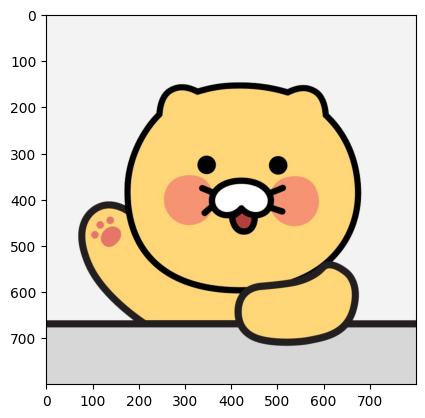

In [2]:
# cv.2.IMREAD_COLOR : 이미지를 컬러로 읽어들임
# cv2.IMREAD_GRAYSCALE : 이미지를 흑백으로 읽어들임
# cv2.IMREAD_UNCHANGED : 이미지를 알파 채널(투명도 채널)까지 포함하여 읽어들임
img_basic = cv2.imread('../assets/cs.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
px = img_basic[500, 500]
# B, G, R 순서로 출력
px

array([120, 215, 255], dtype=uint8)

In [4]:
# G만 출력
px[1]

215

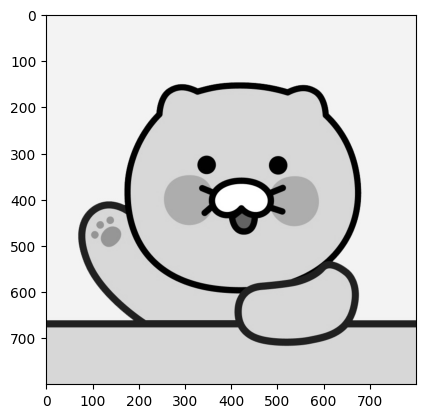

In [5]:
img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))
plt.show()

In [6]:
print(img_basic.shape)
print(img_basic.size)

(800, 800)
640000


In [7]:
px = img_basic[550, 400]
px

216

--- 0.0029897689819335938 seconds ---
--- 0.0009965896606445312 seconds ---


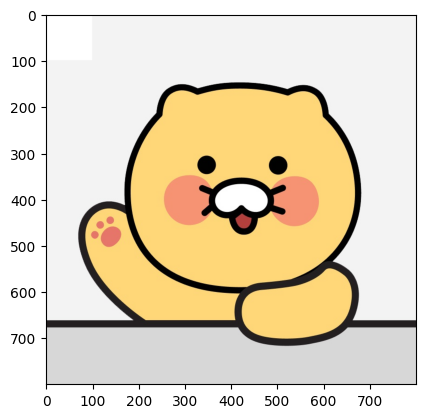

In [35]:
import time

img_basic = cv2.imread('../assets/cs.jpg')

start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        img_basic[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
img_basic[0:100, 0:100] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

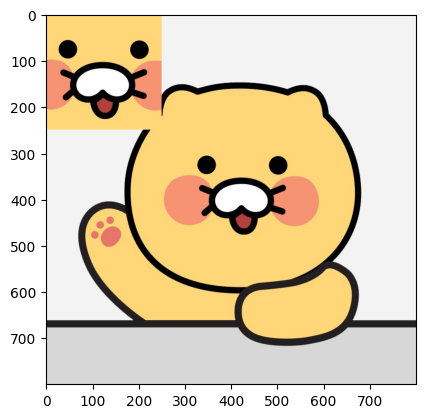

In [45]:
img_basic = cv2.imread('../assets/cs.jpg', cv2.IMREAD_UNCHANGED)

# ROI(Region of Interest, 관심 영역) 설정
# 필터링하거나 어떤 식으로든 연산을 수행하려는 영상의 부분
# [y범위, x범위]
roi = img_basic[250:500, 300:550]
img_basic[0:250, 0:250] = roi

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

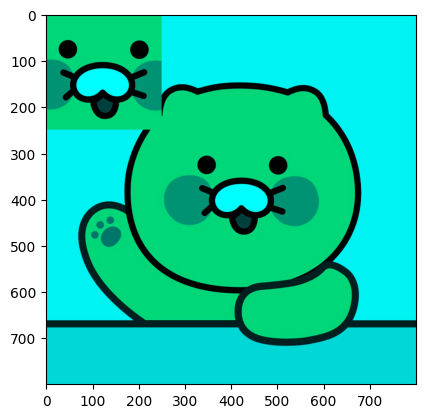

In [47]:
img_basic[:, :, 2] = 0

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

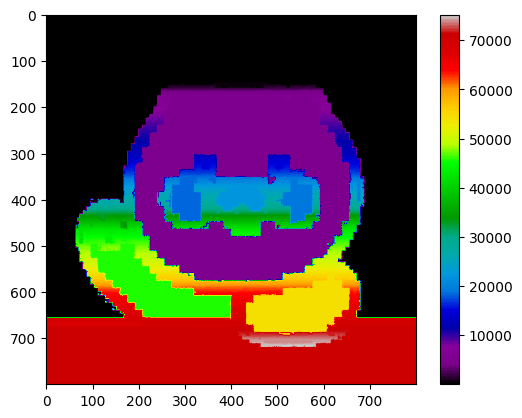

In [53]:
# DFS로 색 탐색하면서 같은 색깔끼리 묶어주기

import numpy as np
import sys

sys.setrecursionlimit(10**6)

img = cv2.imread('../assets/cs.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

visited = np.zeros((img.shape[0], img.shape[1]))
group_id = 1  # 각 그룹에 고유한 ID 할당을 시작하는 값
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]

def dfs(x, y, color, id):
    visited[x, y] = id
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if nx < 0 or nx >= img.shape[0] or ny < 0 or ny >= img.shape[1]:
            continue
        if visited[nx, ny] == 0 and np.array_equal(img[nx, ny], color):
            dfs(nx, ny, color, id)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i, j] == 0:
            dfs(i, j, img[i, j], group_id)
            group_id += 1  # 새 그룹을 시작할 때마다 ID 증가

# 결과를 보여줍니다. 각각의 그룹은 고유한 숫자(그룹 ID)로 표시됩니다.
plt.imshow(visited, cmap='nipy_spectral')
plt.colorbar()  # 색상 막대를 추가하여 다양한 그룹을 시각적으로 구분할 수 있습니다.
plt.show()